Task:
As a data analyst, your task is to prepare and analyse the data set using appropriate data preparation and statistical techniques and ultimately apply the machine learning models for the specified tasks. Your analysis should aim to identify any relationships or trends in the data that can be used to improve employee satisfaction, productivity and issues. Recognise suitable independent variables and target variable from the dataset to justify your classification/ prediction tasks. You can perform clustering on the dataset based on your analysis if applicable. You can generate synthetic data or use any additional data to support your machine learning models if required.


Data Preparation
● Characterisation of the data set: size; number of attributes; has/does not have missing values, number of observations etc.[0-10]
● Application of Data preparation/evaluation methods (Cleaning, renaming, etc) and EDA (Exploratory Data Analysis) visualizations (plural), including a clear and concise explanation of your rationale for what you are doing with the data and why you are doing it.[0-20]
● Apply encoding, scaling and feature engineering as and if required, detailing how and why you used these techniques and the rationale for your decisions.[0-30]
● Explore the possibility of using dimensional reduction on the dataset. Employ both LDA (Linear Discriminant Analysis) and PCA (Principal Component Analysis) and compare the separation of
classes through visualization. Explain the difference between both techniques in your own words and discuss in detail how your results may affect your analysis of classifying or clustering the normal as compared to anomalous biddings.[0-40]


Machine Learning
● Provide a conceptual understanding and logical justification based on the reasoning for the specific choice of machine learning approaches (supervised/ Unsupervised) for the provided data set. (0-20 marks)
● Machine Learning models can be used for Prediction, Classification, and Clustering. You can choose suitable features for the machine learning models based on feature selection methods, such as random forest or any other method. The selection of hyperparameters for the ML models should be performed by using hyperparameter tuning, such as GridSearchCV. Obtain best accuracy using optimal values of the hyperparameters.. (0-30 marks)
● You should train and test the Machine learning models in the case of supervised learning for different splits (at least 2 different splits) and use appropriate metrics for unsupervised learning. Use K-fold cross-validation to provide authenticity of the modelling outcomes. (0-30 marks)
● Exhibit a comparison of ML modelling outcomes using a Table or graph visualisation. Identify the possible similarities and contrast of the Machine Learning modelling outcomes based on chosen metric and discuss their statistical understanding. (0-20 marks)


Report
A report is required to provide the details of work performed in all tasks. The report should be based on Introduction, rationale of data preparation techniques, machines learning models and conclusions. Illustrations should be used to highlight the details of any section.
This should also include evidence to support your data wrangling and analysis through the use of references and citations.
Conclusions, Findings of data set and references/citations in (HARVARD style). This should be completed in the Jupyter Notebook Markdown.

# Libraries 

In [1]:
%matplotlib inline

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import statsmodels.api as sm

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn import metrics

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import MinMaxScaler

from sklearn.decomposition import PCA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

License
This dataset is licensed under a Creative Commons Attribution 4.0 International (CC BY 4.0) license.

This allows for the sharing and adaptation of the datasets for any purpose, provided that the appropriate credit is given.

DOI
10.24432/C5BS66

Creators
NA NA
National Center for Health Statistics (NCHS) at the Centers for Disease Control and Prevention (CDC)

https://archive.ics.uci.edu/dataset/887/national+health+and+nutrition+health+survey+2013-2014+(nhanes)+age+prediction+subset

# Same text as ca1

# EDA

Exploratory Data Analysis. 

After importing the necessary libraries the next step is to do the Exploratory Data Analysis in our raw data to check its characteristics, such as: the size, shape, which kind of features and observations they are, if there are any missing or duplicated values and what kind of distribution it is. EDA was originally developed in 1970 by the American mathematician John Tukey (IBM, 2023). 

This is a crucial task because it is the one that helps us to understand what we are dealing with and which approach we are going to use next to obtain a good accuracy for the Machine Learning Model applied and get effective results. 



In [2]:
age = pd.read_csv("NHANES_age_prediction.csv")

In [3]:
age.tail(2)

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
2276,83718.0,Adult,60.0,2.0,2.0,27.4,90.0,2.0,108.0,4.99
2277,83727.0,Adult,26.0,1.0,2.0,24.5,108.0,2.0,108.0,3.76


In [4]:
age.shape

(2278, 10)

In [5]:
age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SEQN       2278 non-null   float64
 1   age_group  2278 non-null   object 
 2   RIDAGEYR   2278 non-null   float64
 3   RIAGENDR   2278 non-null   float64
 4   PAQ605     2278 non-null   float64
 5   BMXBMI     2278 non-null   float64
 6   LBXGLU     2278 non-null   float64
 7   DIQ010     2278 non-null   float64
 8   LBXGLT     2278 non-null   float64
 9   LBXIN      2278 non-null   float64
dtypes: float64(9), object(1)
memory usage: 178.1+ KB


In [6]:
age.duplicated().sum()

0

In [7]:
age.describe()

,SEQN,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
count,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000
mean,78691.853819,41.795874,1.511414,1.822651,27.955180,99.553117,2.016242,114.978929,11.834794
std,2921.365151,20.156111,0.499979,0.398918,7.248962,17.889834,0.185556,47.061239,9.718812
min,73564.000000,12.000000,1.000000,1.000000,14.500000,63.000000,1.000000,40.000000,0.140000
25%,76171.750000,24.000000,1.000000,2.000000,22.800000,91.000000,2.000000,87.000000,5.860000
50%,78749.000000,41.000000,2.000000,2.000000,26.800000,97.000000,2.000000,105.000000,9.040000
75%,81213.500000,58.000000,2.000000,2.000000,31.200000,104.000000,2.000000,130.000000,14.440000
max,83727.000000,80.000000,2.000000,7.000000,70.100000,405.000000,3.000000,604.000000,102.290000


In [8]:
age.drop(columns = "SEQN", inplace = True)

SEQN = SEQN	ID	Continuous		Respondent Sequence Number		no

no need for this variable 

In [9]:
age["age_group"].unique()

array(['Adult', 'Senior'], dtype=object)

In [10]:
age["age_group"].value_counts()

age_group
Adult     1914
Senior     364
Name: count, dtype: int64

/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age_group', ylabel='Count'>

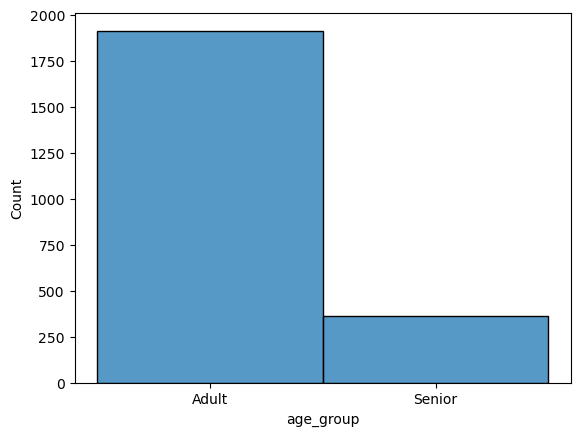

In [11]:
sns.histplot(data = age, x = "age_group")

# Same text as ca1

By plotting this graphic of the target variable "class" we can see that the amount of failures for components not related to the APS system is significantly superior to the ones related to the APS. The difference between the two classes are so strong that it may be necessary to balance the dataset so the accuracy can be more trustworthy. A higher accuracy in this case might be misleading given the bias. The imbalance of the dataset can cause an overfitting in the Machine Learning Model when the minority class tends to be ignored over the majority (Truong, 2022). 

The application of SMOTE (Synthetic Minority Oversampling Technique), where the dataset is balanced by the creation of synthetic samples of the minority class (SATPATHY) can be a solution for this problem or undersampling techniques such as Near-miss that eliminate the majority class observations by random in order to balance the dataset (Imarticus, 2021).


# SAME TEXT AS CA1

"Forcing an ordinal relationship via an ordinal encoding and allowing the model to assume a natural ordering between categories may result in poor performance or unexpected results (predictions halfway between categories)." (Brownlee, 2020). That is the reason why the variable "class" will be transformed in a numerical data through the One-Hot Enconding where a binary value will be put in place and no ordinal relationship will be forced. This method create two new features where "class_neg" will be 1 when the "neg" value is true and 0 when is false and "class_pos" will be the oposite. The new variable "class_pos" will be dropped so we have just one target variable and the Machine Learning models can perform their mathematical procedures. 

In [12]:
age = pd.get_dummies(age, dtype = int)

In [13]:
age.tail(2)

,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group_Adult,age_group_Senior
2276,60.0,2.0,2.0,27.4,90.0,2.0,108.0,4.99,1,0
2277,26.0,1.0,2.0,24.5,108.0,2.0,108.0,3.76,1,0


In [14]:
age.drop(columns = "age_group_Senior", inplace = True)

### There are more 0 in the "age_group_Senior" column 
justigy why this is better

In [15]:
age.tail(2)

,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group_Adult
2276,60.0,2.0,2.0,27.4,90.0,2.0,108.0,4.99,1
2277,26.0,1.0,2.0,24.5,108.0,2.0,108.0,3.76,1


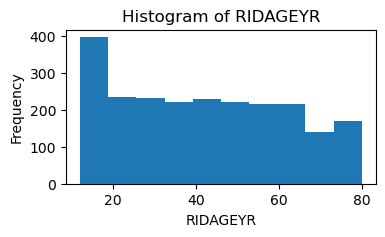

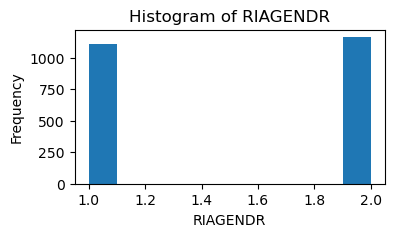

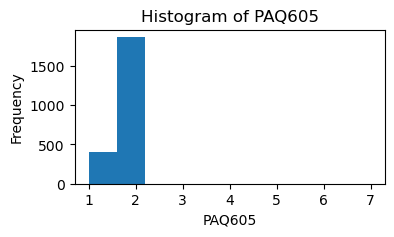

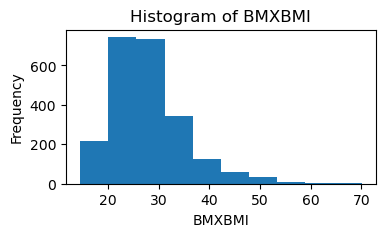

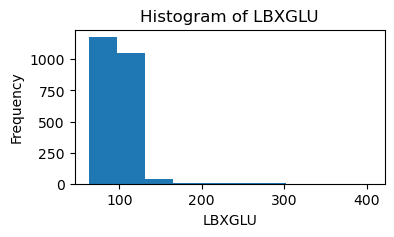

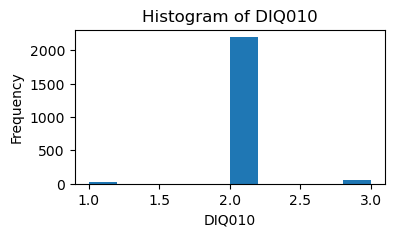

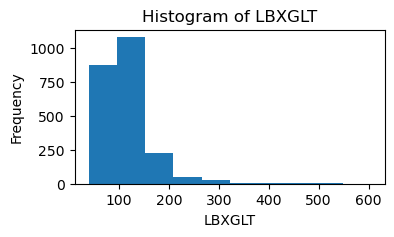

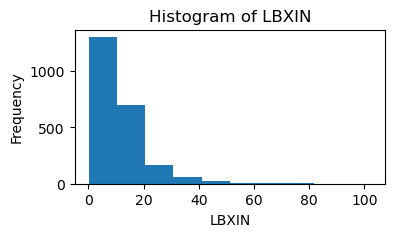

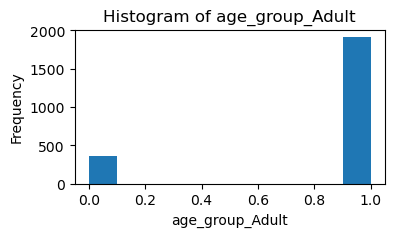

In [16]:
for column in age.columns:
    plt.figure(figsize = (4, 2))
    plt.hist(age[column])
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

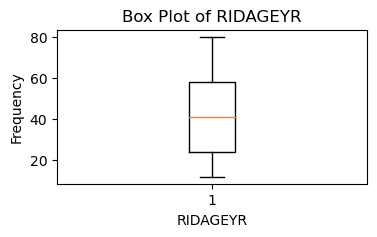

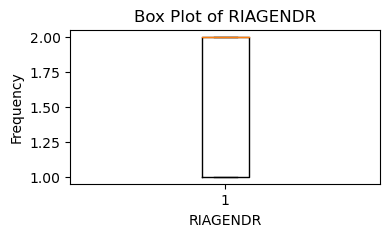

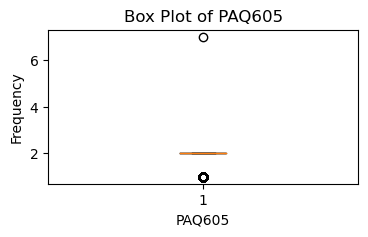

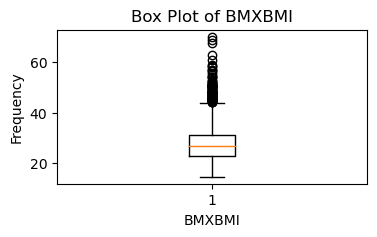

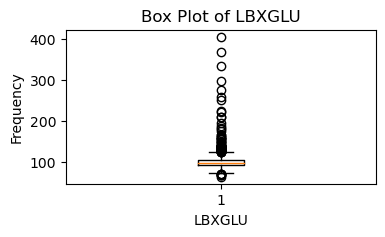

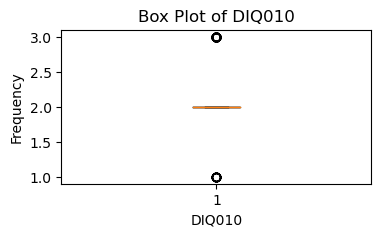

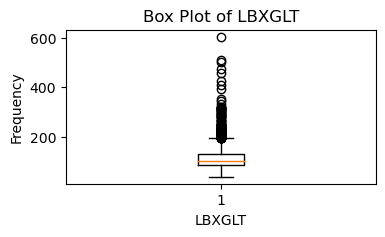

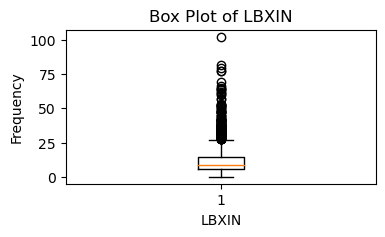

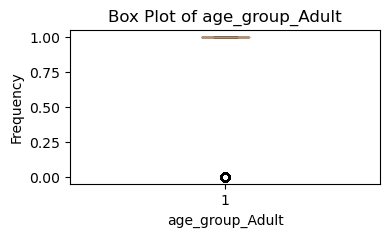

In [17]:
for column in age.columns:
    plt.figure(figsize = (4, 2))
    plt.boxplot(age[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

The distribution of the columns are not normal as we can see in the graphics 

# Correlation

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Variable"] = age.columns
vif_data["VIF"] = [variance_inflation_factor(age.values, i) for i in range(age.shape[1])]
print(vif_data)

          Variable        VIF
0         RIDAGEYR  11.209553
1         RIAGENDR  10.367954
2           PAQ605  20.416338
3           BMXBMI  24.915629
4           LBXGLU  54.956103
5           DIQ010  55.210887
6           LBXGLT  14.247082
7            LBXIN   3.951943
8  age_group_Adult  11.327506


corr_matrix = np.corrcoef(age, rowvar = False)

sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f', 
            xticklabels = range(age.shape[1]), yticklabels = range(age.shape[1]))
plt.title("Feature Correlation Matrix")
plt.show()

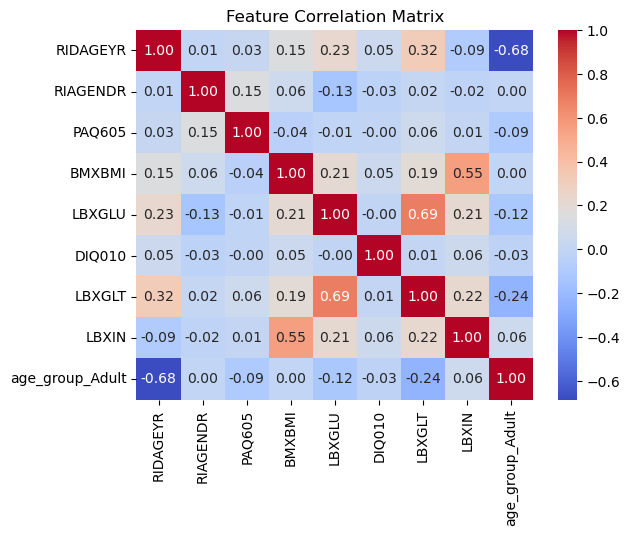

In [19]:
corr_matrix = age.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f',
            xticklabels=age.columns, yticklabels=age.columns)

plt.title("Feature Correlation Matrix")
plt.show()

In [20]:
eigenvalues, _ = np.linalg.eig(corr_matrix)
print("Eigenvalues:", eigenvalues)

Eigenvalues: [2.28735158 1.6442327  0.25546501 0.28328876 0.46698967 1.18954507
 1.07942265 0.96177846 0.83192609]


In [21]:
condition_number = np.sqrt(np.max(eigenvalues) / np.min(eigenvalues))
print("Condition Number:", condition_number)

Condition Number: 2.992269808680624


In [22]:
def find_highly_correlated_vars(corr_matrix, threshold = 0.5):
    if isinstance(corr_matrix, pd.DataFrame):
        corr_matrix = corr_matrix.values
    rows, cols = np.where(np.abs(corr_matrix) > threshold)
    unique_pairs = set((min(r, c), max(r, c)) for r, c in zip(rows, cols) if r != c)
    return list(unique_pairs)

corr_matrix = age.corr()
highly_corr_vars = find_highly_correlated_vars(corr_matrix, threshold=0.5)

print("Pairs of highly correlated variables:", highly_corr_vars)

Pairs of highly correlated variables: [(3, 7), (0, 8), (4, 6)]


In [23]:
age.tail()

,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group_Adult
2273,38.0,2.0,2.0,33.5,100.0,2.0,73.0,6.53,1
2274,61.0,1.0,2.0,30.0,93.0,2.0,208.0,13.02,1
2275,34.0,1.0,2.0,23.7,103.0,2.0,124.0,21.41,1
2276,60.0,2.0,2.0,27.4,90.0,2.0,108.0,4.99,1
2277,26.0,1.0,2.0,24.5,108.0,2.0,108.0,3.76,1


In [24]:
age_array = age.values

In [25]:
X = age_array[:, 0:8]

y = age_array[:, 8]

In [26]:
y

array([1., 1., 1., ..., 1., 1., 1.])

In [27]:
X.shape

(2278, 8)

In [28]:
X_with_constant = sm.add_constant(X)

model = sm.OLS(y, X_with_constant).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     278.5
Date:                Sat, 23 Dec 2023   Prob (F-statistic):               0.00
Time:                        17:09:53   Log-Likelihood:                -166.09
No. Observations:                2278   AIC:                             350.2
Df Residuals:                    2269   BIC:                             401.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1410      0.078     14.679      0.0

## Normalisation

The MinMax method was chosen given the skeweness of the data. 

In [29]:
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

In [30]:
X_scaled

array([[0.72058824, 1.        , 0.16666667, ..., 0.5       , 0.19503546,
        0.14459129],
       [0.20588235, 1.        , 0.16666667, ..., 0.5       , 0.07092199,
        0.03631914],
       [0.05882353, 0.        , 0.16666667, ..., 0.5       , 0.04964539,
        0.05873715],
       ...,
       [0.32352941, 0.        , 0.16666667, ..., 0.5       , 0.14893617,
        0.2082232 ],
       [0.70588235, 1.        , 0.16666667, ..., 0.5       , 0.12056738,
        0.0474792 ],
       [0.20588235, 0.        , 0.16666667, ..., 0.5       , 0.12056738,
        0.03543808]])

# PCA

In [31]:
pca = PCA()

pca.fit(X_scaled)

PCA()

In [32]:
variance = pca.explained_variance_ratio_

var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 3)*100)

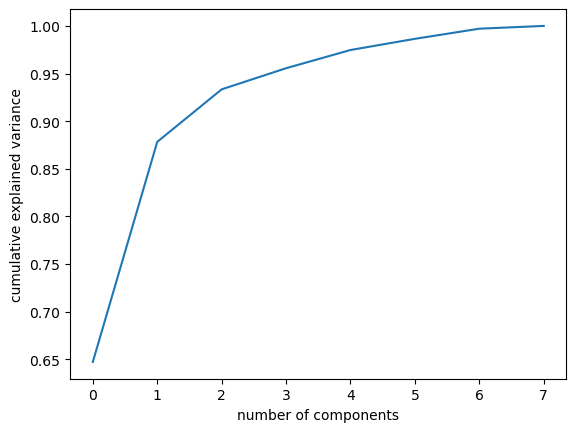

In [33]:
pca = PCA().fit(X_scaled) 
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.xlabel('number of components') 
plt.ylabel('cumulative explained variance'); 

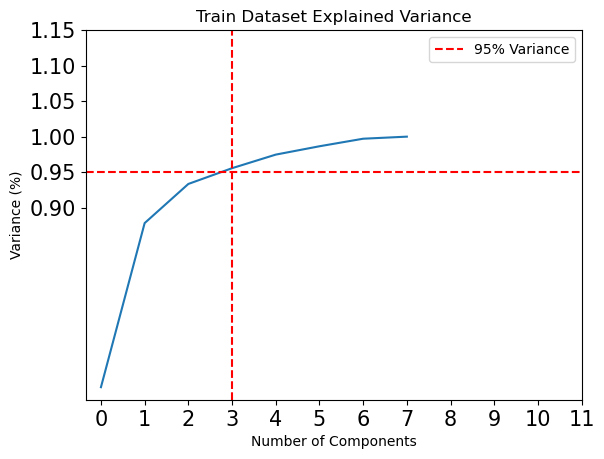

In [34]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.xticks(np.arange(0, 12, 1), fontsize = 15)
plt.ylabel("Variance (%)")
plt.yticks(np.arange(0.90, 1.2, 0.05), fontsize = 15)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
index_95 = np.argmax(cumulative_variance >= 0.95)
plt.axvline(x=index_95, color='r', linestyle='--')
plt.legend()
plt.title("Train Dataset Explained Variance")
plt.show()

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 12)

In [36]:
X_scaled.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2278, 8), (2278,), (1822, 8), (456, 8), (1822,), (456,))

# APPLYING PCA

In [37]:
pca = PCA(n_components = 3)

X_train_pca = pca.fit_transform(X_train)

X_test_pca = pca.transform(X_test)

In [38]:
X_train_pca

array([[ 0.51000913, -0.37657029, -0.09446004],
       [ 0.50599774,  0.44117417, -0.098574  ],
       [ 0.51012496, -0.32037889, -0.11426334],
       ...,
       [ 0.51030891, -0.13495738, -0.03789707],
       [ 0.50521339,  0.11171838,  0.06021026],
       [ 0.51096318, -0.44987948, -0.06524646]])

In [39]:
X_test_pca

array([[-0.49462407,  0.04818822,  0.11716291],
       [-0.49598375,  0.13922063,  0.01627252],
       [-0.49406306,  0.02309025, -0.0522558 ],
       ...,
       [ 0.5077708 , -0.09856488, -0.08170188],
       [-0.4883125 , -0.42014868,  0.08424916],
       [ 0.51502576, -0.45583205, -0.15858837]])

In [40]:
X_train_pca.shape, X_test_pca.shape

((1822, 3), (456, 3))

# LDA

In [41]:
num_components = len(np.unique(y)) - 1
print(f'Number of Components for LDA: {num_components}')

Number of Components for LDA: 1


In [42]:
lda = LinearDiscriminantAnalysis(n_components = 1)

X_train_lda = lda.fit_transform(X_train, y_train)

X_test_lda = lda.transform(X_test)

In [43]:
X_train_lda.shape, X_test_lda.shape

((1822, 1), (456, 1))

# Split the Dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)

X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

# Models Testing

In [44]:
from sklearn import metrics

from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score

# SVM 

In [45]:
from sklearn import svm

In [46]:
cls_svm = svm.SVC(kernel = "linear") 

cls_svm.fit(X_train_pca, y_train)

y_pred_svm = cls_svm.predict(X_test_pca)

# KNN MODEL

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
kNN = KNeighborsClassifier(n_neighbors = 9)

kNN.fit(X_train_pca, y_train)

y_pred_knn = kNN.predict(X_test_pca)

# Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
rf_classifier = RandomForestClassifier(n_estimators = 100, random_state = 50)

rf_classifier.fit(X_train_pca, y_train)

RandomForestClassifier(random_state=50)

In [51]:
y_pred_rf = rf_classifier.predict(X_test_pca)

In [52]:
print("Accuracy SVM:", metrics.accuracy_score(y_test, y_pred_svm))

print("Accuracy KNN:", metrics.accuracy_score(y_test, y_pred_knn))

print("Accuracy RF:", metrics.accuracy_score(y_test, y_pred_rf))

Accuracy SVM: 0.9890350877192983
Accuracy KNN: 0.9912280701754386
Accuracy RF: 0.9978070175438597


In [53]:
print("Classification Report SVM:", classification_report(y_test, y_pred_svm))

print("Classification Report KNN:", classification_report(y_test, y_pred_knn))

print("Classification Report RF:", classification_report(y_test, y_pred_rf))

Classification Report SVM:               precision    recall  f1-score   support

         0.0       1.00      0.92      0.96        66
         1.0       0.99      1.00      0.99       390

    accuracy                           0.99       456
   macro avg       0.99      0.96      0.98       456
weighted avg       0.99      0.99      0.99       456

Classification Report KNN:               precision    recall  f1-score   support

         0.0       0.98      0.95      0.97        66
         1.0       0.99      1.00      0.99       390

    accuracy                           0.99       456
   macro avg       0.99      0.98      0.98       456
weighted avg       0.99      0.99      0.99       456

Classification Report RF:               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99        66
         1.0       1.00      1.00      1.00       390

    accuracy                           1.00       456
   macro avg       0.99      1.00      1.00     

# SVM 

In [54]:
from sklearn import svm

In [55]:
cls_svm = svm.SVC(kernel = "linear") 

cls_svm.fit(X_train_lda, y_train)

y_pred_svm = cls_svm.predict(X_test_lda)

# KNN MODEL

In [56]:
from sklearn.neighbors import KNeighborsClassifier

In [57]:
kNN = KNeighborsClassifier(n_neighbors = 9)

kNN.fit(X_train_lda, y_train)

y_pred_knn = kNN.predict(X_test_lda)

# Random Forest

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
rf_classifier = RandomForestClassifier(n_estimators = 100, random_state = 50)

rf_classifier.fit(X_train_lda, y_train)

RandomForestClassifier(random_state=50)

In [60]:
y_pred_rf = rf_classifier.predict(X_test_lda)

In [61]:
print("Accuracy SVM:", metrics.accuracy_score(y_test, y_pred_svm))

print("Accuracy KNN:", metrics.accuracy_score(y_test, y_pred_knn))

print("Accuracy RF:", metrics.accuracy_score(y_test, y_pred_rf))

Accuracy SVM: 0.9758771929824561
Accuracy KNN: 0.9692982456140351
Accuracy RF: 0.9627192982456141


In [62]:
print("Classification Report SVM:", classification_report(y_test, y_pred_svm))

print("Classification Report KNN:", classification_report(y_test, y_pred_knn))

print("Classification Report RF:", classification_report(y_test, y_pred_rf))

Classification Report SVM:               precision    recall  f1-score   support

         0.0       0.91      0.92      0.92        66
         1.0       0.99      0.98      0.99       390

    accuracy                           0.98       456
   macro avg       0.95      0.95      0.95       456
weighted avg       0.98      0.98      0.98       456

Classification Report KNN:               precision    recall  f1-score   support

         0.0       0.88      0.91      0.90        66
         1.0       0.98      0.98      0.98       390

    accuracy                           0.97       456
   macro avg       0.93      0.94      0.94       456
weighted avg       0.97      0.97      0.97       456

Classification Report RF:               precision    recall  f1-score   support

         0.0       0.86      0.89      0.87        66
         1.0       0.98      0.97      0.98       390

    accuracy                           0.96       456
   macro avg       0.92      0.93      0.93     